In [1]:
import math as mt
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import matplotlib.colors as clrs
plt.rcParams.update({"text.usetex": True})
import modplot
%matplotlib notebook

import energyflow as ef

### Read in the Open Data

This cell determines the jet $p_T$, $|\eta|$, and quality selections and reads in the datasets. The defaults are jets with $p_T\in[375,425]$ GeV and $|\eta|<1.9$ of "medium" quality. A small fraction of each dataset is used by default.

**Customize:** You can change the `specs` to any desired jet selection. Make sure to change the corresponding plot stamp description of the selection.

In [2]:
# use a fraction of the full datasets (amount=1.0 uses the full datasets)
amount = 0.01

# select jets with JEC-corrected pT in [375, 425] GeV and |eta| < 1.9, with "medium" quality
specs = ['375 <= corr_jet_pts <= 425', 'abs_jet_eta < 1.9', 'quality >= 2']

# stamp description of the jet selections
legend_label_0 = r'AK5 Jets, $|\eta^{\rm jet}|<1.9$'
legend_label_1 = r'$p_T^{\rm jet}\in [375,425]$ GeV'

# load the CMS (cms), Pythia-generated (gen), and detector-simulated (sim) datasets
cms = ef.mod.load(*specs, dataset='cms', amount=amount, validate_files=True)
sim = ef.mod.load(*specs, dataset='sim', amount=amount, store_gens=False)
gen = ef.mod.load(*specs, dataset='gen', amount=amount)

# show the details of the CMS, SIM, and GEN datasets
#print(cms)
#print(sim)
#print(gen)

### SIM Data
Dataframe created below contains ::: jets_i + original index position + jets_f.
Having original index position of a jet in initial dataframe, allows to accurately get the pfcs after processing the dataframes.

In [3]:
# Create the Dataframe
sim_i_df = pd.DataFrame(sim.jets_i, columns=sim.jets_i_cols)

# Create a sample of index positions [0, 1, 2, 3, 4, .....,N-1 ,N]
col0 = np.linspace(0, len(sim.jets_i), num=len(sim.jets_i), dtype=int, endpoint=False)

# Insert those indexes into the Dataframe 
# Indexes are inserted after the final column of the original sim_df Dataframe
end = len(sim.jets_i[0])
sim_i_df.insert(end, 'index_pos', col0)

# Create a Dataframe for jets_f array
sim_f_df = pd.DataFrame(sim.jets_f, columns=sim.jets_f_cols)

# Concatenate the 2 Dataframes
sim_df = pd.concat([sim_i_df, sim_f_df], axis=1)

# Add a column for k-factors
sim_factors = ef.mod.kfactors('sim', sim.corr_jet_pts, sim.npvs)
sim_df = pd.concat([sim_df, pd.DataFrame(sim_factors, columns=['kfactor'])], axis=1)

# Show the final Dataframe
#sim_df.head(7)

# Find the duplicates and sort based also on jet_pt
key = sim_df.duplicated(subset=['rn', 'lbn', 'evn'], keep=False)
sim_multijetdf = sim_df[key]
sim_multijetdf = sim_multijetdf.sort_values(by=['rn', 'lbn', 'evn','jet_pt'], axis=0, ascending=[True, True, True, False], ignore_index=True)
sim_multijetdf.head(10)

###################################################

# If u want to check result, remove comment from below

#y = sim_multijetdf.value_counts(subset=['rn','lbn', 'evn']).to_frame(name='count').reset_index()
#y.loc[y['count'] == 2]
#y
####################################################

,fn,rn,lbn,evn,npv,quality,hard_pid,index_pos,jet_pt,jet_y,...,gen_jet_pt,gen_jet_y,gen_jet_phi,gen_jet_m,gen_jet_eta,hard_pt,hard_y,hard_phi,weight,kfactor
0,727,1,3,519,6,3,1,37283,399.900452,-1.014915,...,368.495347,-1.015617,6.115013,9.533290,-1.015874,370.320068,-1.015215,6.114893,0.000005,1.426286
1,727,1,3,519,6,3,2,37284,370.064056,-0.426476,...,397.436792,-0.423359,2.885531,48.480370,-0.426320,398.547760,-0.412661,2.882868,0.000005,1.418758
2,727,1,3,543,7,3,-1,37286,403.371063,-0.463280,...,416.432683,-0.462980,1.360069,22.358314,-0.463602,424.624878,-0.462326,1.359082,0.000005,1.231861
3,727,1,3,543,7,3,2,37287,365.361084,-1.425226,...,350.061606,-1.365593,4.277766,13.765034,-1.366271,370.141632,-1.417398,4.335003,0.000005,1.226136
4,727,1,3,596,5,3,2,37294,393.117737,-0.395765,...,374.996079,-0.395500,5.883945,36.051299,-0.397234,370.340790,-0.387822,5.882631,0.000005,1.597097
5,727,1,3,596,5,3,1,37295,356.195160,-1.224195,...,380.306487,-1.211859,2.743252,65.832116,-1.224246,379.471436,-1.226154,2.745354,0.000005,1.590633
6,727,1,3,598,5,3,2,37296,397.360962,0.121860,...,399.989073,0.120497,3.054855,24.778301,0.120727,394.783814,0.121861,3.057950,0.000005,1.598134
7,727,1,3,598,5,3,21,37297,368.829041,-1.580098,...,411.789391,-1.578472,6.215758,31.137120,-1.581091,411.356811,-1.576477,6.218165,0.000005,1.591569
8,727,1,3,623,4,3,21,37299,405.696228,0.537672,...,422.489068,0.543641,5.308948,32.941338,0.545145,443.373444,0.542849,5.305156,0.000005,1.720798
9,727,1,3,623,4,3,21,37300,403.338776,0.253836,...,413.473340,0.247769,2.244297,58.920335,0.250221,431.533539,0.234132,2.173787,0.000005,1.719851


### CMS Data

Dataframe created below contains ::: jets_i + original index position + jets_f.
Having original index position of a jet in initial dataframe, allows to accurately get the pfcs after processing the dataframes.

In [4]:
# Create the Dataframe
cms_i_df = pd.DataFrame(cms.jets_i, columns=cms.jets_i_cols)

# Create a sample of index positions [0, 1, 2, 3, 4, .....,N-1 ,N]
col0 = np.linspace(0, len(cms.jets_i), num=len(cms.jets_i), dtype=int, endpoint=False)

# Insert those indexes into the Dataframe 
# Indexes are inserted after the final column of the original cms_df Dataframe
end = len(cms.jets_i[0])
cms_i_df.insert(end, 'index_pos', col0)

# Create a Dataframe for jets_f array
cms_f_df = pd.DataFrame(cms.jets_f, columns=cms.jets_f_cols)

# Concatenate the 2 Dataframes
cms_df = pd.concat([cms_i_df, cms_f_df], axis=1)

# Show the final Dataframe
#cms_df.head(7)

# Find duplicate rows by 'run number', 'event number' and 'lumi-block number'. Then store them consequtively.
# For each event, jets sorted by pt-descending order.
key = cms_df.duplicated(subset=['rn', 'lbn', 'evn'], keep=False)
cms_multijetdf = cms_df[key]
cms_multijetdf = cms_multijetdf.sort_values(by=['rn', 'lbn', 'evn','jet_pt'], axis=0, ascending=[True, True, True, False], ignore_index=True)
cms_multijetdf.head(10)

###################################################

# If u want to check result, remove comment from below
#y = cms_multijetdf.value_counts(subset=['rn','lbn', 'evn']).to_frame(name='count').reset_index()
#y.loc[y['count'] == 2]
#y
####################################################

,fn,rn,lbn,evn,npv,quality,index_pos,jet_pt,jet_y,jet_phi,jet_m,jet_eta,jec,jet_area,jet_max_nef,weight
0,62,163270,19,11581000,6,3,44209,396.280579,-0.434044,4.061552,28.942925,-0.435132,1.040877,0.757972,0.391763,0.000008
1,62,163270,19,11581000,6,3,44210,383.399322,-0.461468,0.748706,45.129570,-0.464443,1.039648,0.787892,0.519139,0.000008
2,62,163270,20,12490642,6,3,44215,384.363769,0.255915,6.067917,31.169455,0.256737,1.033607,0.767945,0.250696,0.000008
3,62,163270,20,12490642,6,3,44216,383.563232,0.083641,2.925333,39.990425,0.084094,1.033942,0.767945,0.438273,0.000008
4,62,163270,21,12949566,10,3,44224,402.191925,0.418589,4.344069,66.703331,0.423989,1.036886,0.777918,0.146167,0.000008
5,62,163270,21,12949566,10,3,44225,363.443390,1.185422,1.175189,56.641331,1.195390,1.089859,0.767945,0.115382,0.000008
6,62,163270,23,14740127,3,3,44234,387.941589,0.579091,3.484608,27.396698,0.580391,1.053081,0.807838,0.776760,0.000008
7,62,163270,23,14740127,3,3,44235,351.839569,1.021082,0.327324,31.265890,1.024114,1.085891,0.767945,0.240945,0.000008
8,62,163270,28,17595971,7,3,44256,408.008667,-0.516772,2.622725,56.799912,-0.521350,1.041440,0.787892,0.228286,0.000008
9,62,163270,28,17595971,7,3,44257,397.614868,-0.725106,5.667046,41.824291,-0.728523,1.054892,0.777918,0.175959,0.000008


### Let's begin with CMS Data

In [238]:
# Pick an event (line number) from the above cms_multijetdf. 
Line = 56

# How many jets in that event
N = 2

# View how many jets there are in that event.
cms_multijetdf.iloc[Line : Line + 3]

,fn,rn,lbn,evn,npv,quality,index_pos,jet_pt,jet_y,jet_phi,jet_m,jet_eta,jec,jet_area,jet_max_nef,weight
56,65,163270,490,297582013,3,3,45899,380.108490,0.475592,2.639325,57.762787,0.480669,1.046824,0.777918,0.531399,0.000008
57,65,163270,490,297582013,3,3,45900,357.608978,1.012246,5.762220,69.761986,1.026618,1.084996,0.787892,0.271602,0.000008
58,65,163270,495,300664524,7,3,45910,401.116425,-0.195193,3.088775,36.805740,-0.196002,1.039925,0.807838,0.407850,0.000008


### View the pfcs arrays for these jets

Jet 1

In [239]:
N1 = cms_multijetdf['index_pos'].iloc[Line]
pfcs_jet1df = pd.DataFrame(cms.pfcs[N1], columns=cms.pfcs_cols)

print(f'There are {len(pfcs_jet1df)} pfcs in jet1')
pfcs_jet1df.head()

There are 33 pfcs in jet1


,pt,y,phi,m,pid,vertex
0,0.921463,0.723191,2.283977,0.000022,22.0,0.0
1,0.463826,0.688861,3.016563,0.000000,22.0,0.0
2,3.019538,0.531199,2.225738,0.000000,130.0,0.0
3,0.645328,0.882098,2.665483,0.000000,22.0,0.0
4,0.927240,0.113370,2.483730,0.139570,-211.0,0.0


Jet 2

In [240]:
N2 = cms_multijetdf['index_pos'].iloc[Line + 1]
pfcs_jet2df = pd.DataFrame(cms.pfcs[N2], columns=cms.pfcs_cols)

print(f'There are {len(pfcs_jet2df)} pfcs in jet2')
pfcs_jet2df.head()

There are 48 pfcs in jet2


,pt,y,phi,m,pid,vertex
0,0.451153,1.291392,6.176237,0.13957,211.0,0.0
1,0.578252,0.533296,5.766855,0.13957,-211.0,2.0
2,1.058245,0.838900,6.168887,0.13957,211.0,0.0
3,0.679621,0.708541,5.453721,0.00000,130.0,0.0
4,0.777393,0.747690,5.483527,0.13957,211.0,0.0


### Define a function to handle boundary conditions for phi $ [0 , 2\pi] \rightarrow [-\pi, \pi]$ 

In [241]:
def phi_boundary(phi):
    size = len(phi)
    for ii in range(size):
        while phi[ii] > mt.pi:
            phi[ii] -= 2*mt.pi
        while phi[ii] < -mt.pi:
            phi[ii] += 2*mt.pi
    
    return phi

In [242]:
# Pfcs dataframes as arrays
pfcs_for_jet1 = np.asarray(pfcs_jet1df)
pfcs_for_jet2 = np.asarray(pfcs_jet2df)

#1-d array for pfcs,jets_pt,y,phi 
pfcs1_pt = pfcs_for_jet1[:, 0]
pfcs1_y = pfcs_for_jet1[:, 1]
pfcs1_phi = pfcs_for_jet1[:, 2]

pfcs2_pt = pfcs_for_jet2[:, 0]
pfcs2_y = pfcs_for_jet2[:, 1]
pfcs2_phi = pfcs_for_jet2[:, 2]


#Appending the arrays to get one of 'em

pfcs_pt = np.concatenate((pfcs1_pt, pfcs2_pt))
pfcs_y = np.concatenate((pfcs1_y, pfcs2_y))
pfcs_phi = np.concatenate((pfcs1_phi, pfcs2_phi))

# Boundary conditions for phi
pfcs_phi = phi_boundary(pfcs_phi)

In [243]:
# Jet Dataframe as array
jet1 = np.asarray(cms_multijetdf.iloc[Line])
jet2 = np.asarray(cms_multijetdf.iloc[Line + 1])

# Column indexes
n1 = cms_df.columns.get_loc('jet_pt')
n2 = cms_df.columns.get_loc('jet_y')
n3 = cms_df.columns.get_loc('jet_phi')

jet1_pt = jet1[n1]
jet1_y = jet1[n2]
jet1_phi = jet1[n3]

jet2_pt = jet2[n1]
jet2_y = jet2[n2]
jet2_phi = jet2[n3]

#Appending the arrays to get one of 'em

jet_pt = np.array([jet1_pt, jet2_pt])
jet_y = np.array([jet1_y, jet2_y])
jet_phi = np.array([jet1_phi, jet2_phi])

# Boundary conditions for jet azimuthal angle
jet_phi = phi_boundary(jet_phi)
jet1_phi = jet_phi[0]
jet2_phi = jet_phi[1]

# Y-Phi scatter plot for pfcs and jets 
Size of each pfc is pt-weighted.

Size of each jet is weighted by a factor of 10*pt.

<IPython.core.display.Javascript object>


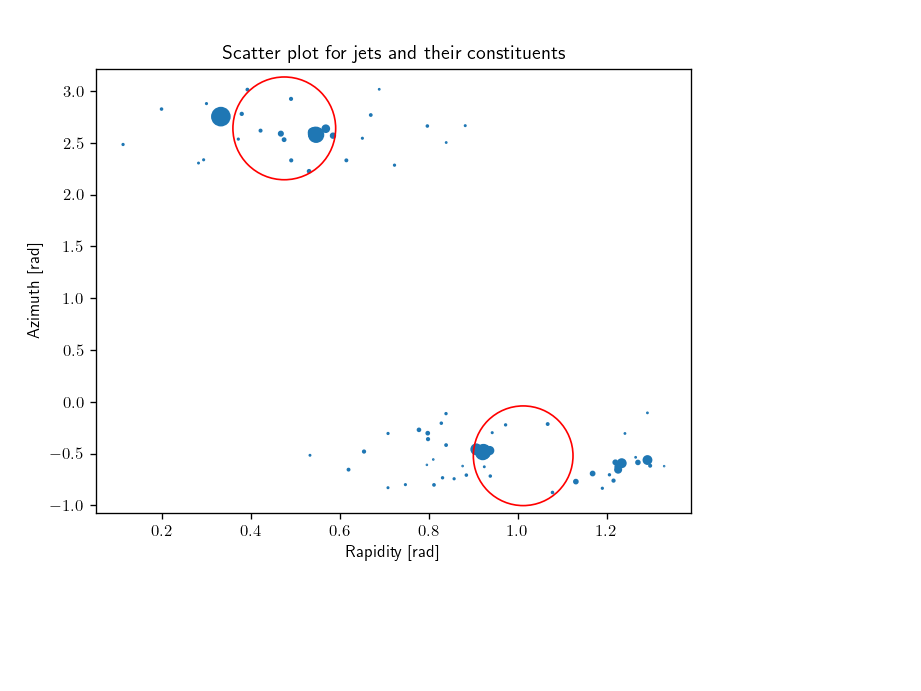

In [244]:
#The line connecting the 2 pfcs area is the jet connection vector

fig, ax = plt.subplots()
colors = clrs.Normalize
plt.scatter(pfcs_y, pfcs_phi, s=pfcs_pt, cmap = plt.cm.viridis)
plt.scatter(jet_y, jet_phi, s=10*jet_pt, cmap = plt.cm.viridis, facecolors='none', edgecolors='r')

#Titles for staff
plt.title('Scatter plot for jets and their constituents')
plt.xlabel('Rapidity [rad]')
plt.ylabel('Azimuth [rad]')

fig.show()

# Calculating pull vector for each jet and pull angle

# Define your pull vector function

In [245]:
#Pass 2 arrays that include as collumns pt|y|phi|mass
#Jet_array need to be [1, 4] and pfcs [N, :]
#Returns 1d array [y-component, phi-component]

def pull_vector(jet_array, pfcs_array):
    particle_pt = pfcs_array[:, 0]
    particle_y = pfcs_array[:,1]
    particle_phi = pfcs_array[:,2]
    
    jet_pt = jet_array[0]
    jet_y = jet_array[1]
    jet_phi = jet_array[2]
    pull_magn = 0
    plv = np.array([0., 0.])
    
    for i in range(len(particle_pt)):
        ratio = particle_pt[i] / jet_pt
        dy = particle_y[i] - jet_y
        dphi = particle_phi[i] - jet_phi
        pull_magn = ratio*((dy**2 + dphi**2)**(0.5))
        plv[0] += pull_magn*dy
        plv[1] += pull_magn*dphi
    
    return plv

# Define pull angle

In [246]:
#Takes as arguments 1 jet pull vector, 
#another 2 jet vectors to construct the jet connection vector.
#Return a 1d array of pull angle [y, phi]

def pull_angle(jet_plv, jet_1, jet_2):
    connect12 = np.array([jet_2[1] - jet_1[1], jet_2[2] - jet_1[2]])
    numerator = np.dot(jet_plv, connect12)
    conn_norm = mt.sqrt(connect12[0]**2 + connect12[1]**2)
    plv_norm = mt.sqrt(jet_plv[0]**2 + jet_plv[1]**2)
    denominator = conn_norm*plv_norm
    return mt.acos(numerator/denominator)


In [251]:
#Pull vector function takes as arguments 1d array for jet vector and 2d array for pfcs

v1 = pull_vector(jet1[n1:n3+2], pfcs_for_jet1)
v2 = pull_vector(jet2[n1:n3+2], pfcs_for_jet2)

print(f'The pull vector for jet1 is : {v1}')
print(f'The pull vector for jet2 is : {v2}\n')

#Pull angle function takes as arguments 1d array for jet pull vector, two 1d arrays for jet vectors 

angle12 = pull_angle(v1, jet1[n1:n3+2], jet2[n1:n3+2])
angle21 = pull_angle(v2, jet2[n1:n3+2], jet1[n1:n3+2])

print(f'Pull angle for jet 1 is {mt.degrees(angle12)}')
print(f'Pull angle for jet 2 is {mt.degrees(angle21)}\n')

#The jet connection vector
connection21 = np.array([jet2_y - jet1_y, jet2_phi - jet1_phi])
print(f'Jet connection vector coordinates : {connection21}')

# Calculate the angle of connection vector
# It will help with correctly visualising jet pull vector afterwards
y = connection21[0]
phi = connection21[1]
conn_angle = mt.atan(phi/y)
print(f'\nAngle of the jet_connection vector in degrees : {mt.degrees(conn_angle)}')

The pull vector for jet1 is : [-0.00353744  0.00194948]
The pull vector for jet2 is : [ 0.00696597 -0.00340749]

Pull angle for jet 1 is 70.89157824417734
Pull angle for jet 2 is 73.68460708441465

Jet connection vector coordinates : [ 0.53665345 -3.16029036]

Angle of the jet_connection vector in degrees : -80.36245531640539


### Testing.........

<IPython.core.display.Javascript object>


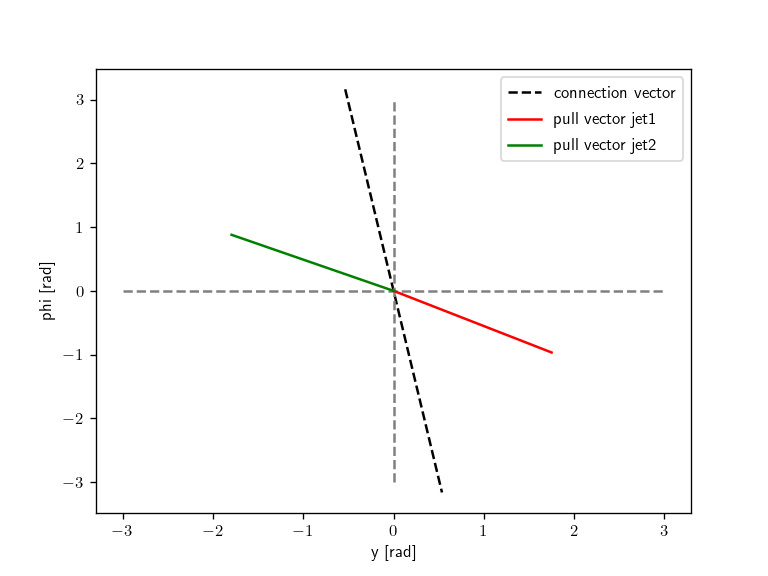

In [252]:
fig, ax = plt.subplots()

# Jet connection vector
x1 = np.array([-connection21[0], connection21[0]])
y1 = np.array([-connection21[1], connection21[1]])

plt.plot(x1, y1, color='black', label='connection vector', linestyle='dashed')

# Axis x and y 
plt.plot([-3, 3], [0, 0], linestyle='--', color='grey')
plt.plot([0, 0], [-3, 3], linestyle='--', color='grey')

# Line perpendicular to jet connection vector


# Pull vector for jet1
r=2
ang = mt.atan(v1[1]/v1[0])
pullx = np.array([0, r*mt.cos(ang)])
pully = np.array([0, r*mt.sin(ang)])

plt.plot(pullx, pully, color='red', label='pull vector jet1')

# Pull vector for jet2
r=2
ang2 = mt.atan(v2[1]/v2[0])
pull2x = np.array([0, r*mt.cos(mt.pi + ang2)])
pull2y = np.array([0, r*mt.sin(mt.pi + ang2)])

plt.plot(pull2x, pull2y, color='green', label='pull vector jet2')

plt.legend()
ax.set_xlabel('y [rad]')
ax.set_ylabel('phi [rad]')

fig.show()

# Plotting everything together---->Scatter plot + Jets + Jet_connection vector + pull_vector

<IPython.core.display.Javascript object>


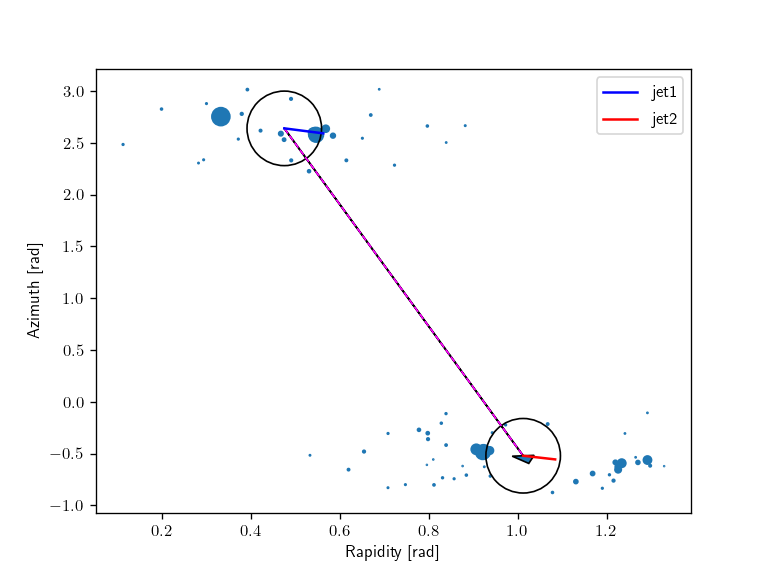

In [257]:
fig, ax = plt.subplots()

#First pfcs
plt.scatter(pfcs_y, pfcs_phi, s=pfcs_pt, cmap = plt.cm.binary)

#Then jets 1 and 2---------->size === 10*jet_pt for clarity purposes
radius = 2000
plt.scatter(jet_y, jet_phi, s=radius, facecolors='none', edgecolors='black')

#Then jet connection line
plt.plot([jet1_y,jet2_y],[jet1_phi,jet2_phi], linewidth=1, color='magenta', linestyle='dashed')
plt.arrow(jet1_y, jet1_phi, jet2_y - jet1_y, jet2_phi- jet1_phi, head_width = 0.05)

##############################################################
##############################################################

#Then pull vectors for each jet
#make an array with x-components and another for y-components

# 1st pull vector
r1 = 0.10
ang1 = mt.atan(v1[1]/v1[0])
x1_comp = np.asarray([jet1_y, jet1_y + r1*mt.cos(ang1)])
y1_comp = np.asarray([jet1_phi, jet1_phi + r1*mt.sin(ang1)])

plt.plot(x1_comp, y1_comp, color='blue', label='jet1')

# 2nd pull vector
r2 = 0.08
ang2 = mt.atan(v2[1]/v2[0])
x2_comp = np.asarray([jet2_y, jet2_y + r2*mt.cos(ang2)])
y2_comp = np.asarray([jet2_phi, jet2_phi + r2*mt.sin(ang2)])

plt.plot(x2_comp, y2_comp, color='red', label='jet2')

##############################################################
##############################################################

# Limits
#ax.set_ylim([-mt.pi, mt.pi])
#ax.set_xlim([-4.5, 4.5])


#Titles
l1 = f'Jet connection vector is shown.\nPull angle for each jet is:'
l2 = f'\n cos(theta_1) = {mt.cos(angle1)}\n cos(theta_2) = {mt.cos(angle2)} '
label = l1 + l2

#ax.set_title(label)
plt.xlabel('Rapidity [rad]')
plt.ylabel('Azimuth [rad]')

plt.legend()

fig.show()